In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [3]:
df_geo = pd.read_csv('../data_tables/geo_series.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo

,Accession,Sample Count,Datasets,PubMed ID
0,GSE1,38,NaN,10952317
1,GSE2,5,NaN,NaN
2,GSE3,342,NaN,11691851
3,GSE4,13,GDS5;GDS135,11158533
4,GSE5,34,GDS6,11030340
...,...,...,...,...
118670,GSE137106,2,NaN,NaN
118671,GSE137458,13,NaN,NaN
118672,GSE137562,4,NaN,NaN
118673,GSE137563,17,NaN,NaN


In [4]:
df_geo.columns = ['GEOSeries', 'Sample_Count','GEODatasets','PubMed ID']
df_geo

,GEOSeries,Sample_Count,GEODatasets,PubMed ID
0,GSE1,38,NaN,10952317
1,GSE2,5,NaN,NaN
2,GSE3,342,NaN,11691851
3,GSE4,13,GDS5;GDS135,11158533
4,GSE5,34,GDS6,11030340
...,...,...,...,...
118670,GSE137106,2,NaN,NaN
118671,GSE137458,13,NaN,NaN
118672,GSE137562,4,NaN,NaN
118673,GSE137563,17,NaN,NaN


In [5]:
df_geo_count = pd.read_csv('../data_tables/GEOSeries_count.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo_count 

,Unnamed: 0,Count,Count.1
0,0,GSE1,61
1,1,GSE10,2
2,2,GSE100,1
3,3,GSE1000,1
4,4,GSE10000,4
...,...,...,...
44734,44734,GSE99990,1
44735,44735,GSE99991,1
44736,44736,GSE99992,2
44737,44737,GSE99993,1


In [6]:
df_geo_count = df_geo_count.drop(df_geo_count.columns[[0]], axis=1)
df_geo_count

,Count,Count.1
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [7]:
df_geo_count.columns = ['GEOSeries','Count']
df_geo_count

,GEOSeries,Count
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [8]:
df_geo = df_geo[['GEOSeries','Sample_Count']].copy()

df_geo

,GEOSeries,Sample_Count
0,GSE1,38
1,GSE2,5
2,GSE3,342
3,GSE4,13
4,GSE5,34
...,...,...
118670,GSE137106,2
118671,GSE137458,13
118672,GSE137562,4
118673,GSE137563,17


In [9]:
df_combined=pd.merge(df_geo, df_geo_count, on="GEOSeries")
df_combined

,GEOSeries,Sample_Count,Count
0,GSE1,38,61
1,GSE2,5,11
2,GSE3,342,11
3,GSE4,13,9
4,GSE5,34,21
...,...,...,...
44531,GSE67888,45,1
44532,GSE87560,24,1
44533,GSE104272,8,1
44534,GSE120376,Mus musculus,1


In [10]:
def f_reuse(df):
    if df['Count']==1:
        val1='primary'
    elif df['Count']>=2 and df['Count']<=10: 
        val1='secondary_2_10'
    elif df['Count']>=11 and df['Count']<=50: 
        val1='secondary_11_50'
    else:
        val1='secondary_above50'
    return val1

In [11]:
df_combined['type']=df_combined.apply(f_reuse,axis=1)
df_combined

,GEOSeries,Sample_Count,Count,type
0,GSE1,38,61,secondary_above50
1,GSE2,5,11,secondary_11_50
2,GSE3,342,11,secondary_11_50
3,GSE4,13,9,secondary_2_10
4,GSE5,34,21,secondary_11_50
...,...,...,...,...
44531,GSE67888,45,1,primary
44532,GSE87560,24,1,primary
44533,GSE104272,8,1,primary
44534,GSE120376,Mus musculus,1,primary


In [12]:
df_combined=df_combined[df_combined.Sample_Count.apply(lambda x: x.isnumeric())]#remove sample count columns that are not numbers
df_combined

,GEOSeries,Sample_Count,Count,type
0,GSE1,38,61,secondary_above50
1,GSE2,5,11,secondary_11_50
2,GSE3,342,11,secondary_11_50
3,GSE4,13,9,secondary_2_10
4,GSE5,34,21,secondary_11_50
...,...,...,...,...
44530,GSE104675,6,1,primary
44531,GSE67888,45,1,primary
44532,GSE87560,24,1,primary
44533,GSE104272,8,1,primary


In [13]:
df_combined = df_combined[df_combined.Sample_Count != "Expression profiling by array"]
df_combined

,GEOSeries,Sample_Count,Count,type
0,GSE1,38,61,secondary_above50
1,GSE2,5,11,secondary_11_50
2,GSE3,342,11,secondary_11_50
3,GSE4,13,9,secondary_2_10
4,GSE5,34,21,secondary_11_50
...,...,...,...,...
44530,GSE104675,6,1,primary
44531,GSE67888,45,1,primary
44532,GSE87560,24,1,primary
44533,GSE104272,8,1,primary


In [14]:
df_combined['Sample_Count'] = df_combined['Sample_Count'].astype(float)

<Figure size 2880x1800 with 0 Axes>

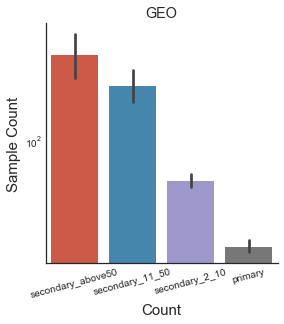

In [15]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='type', y='Sample_Count', data=df_combined,
            height=4,aspect=1,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_title("GEO")
ax.axes[0,0].set_xlabel('Count', fontsize = 15)
ax.axes[0,0].set_ylabel('Sample Count', fontsize = 15)
plt.yscale('log')
plt.xticks(rotation=15)

#save to .png
ax.savefig('GEO_sample_size.png', dpi = 200, bbox_inches = 'tight', transparent = False)

In [16]:
from scipy.stats import ttest_ind

cat1 = df_combined[df_combined['type']=='primary']
cat2 = df_combined[df_combined['type']=='secondary_above50']


ttest_ind(cat1['Sample_Count'], cat2['Sample_Count'])

Ttest_indResult(statistic=-11.509529144023725, pvalue=1.3689637447102395e-30)